In [ ]:
import os
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from preporces_utils import import_image, preprocess_image, load_data_generator, get_labels
from model import build_model
from unet_seg.plot import plotting

In [2]:
plt.style.use("ggplot")
SIZE = 96
path = 'D:\\ds\\whiskey\\whisky_labels\\train\\'

train_images =glob("D:\\ds\\whiskey\\whisky_labels\\train\\**\\*.jpg", recursive=True)
test_images = glob("D:\\ds\\whiskey\\whisky_labels\\test\\**\\*.jpg", recursive=True)
whisky_labels = next(os.walk(path))[1]

y = get_labels(whisky_labels, path)
X = np.array([import_image(img, SIZE) for img in train_images])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2018)

In [3]:
x_train_norm = X_train / 255
x_test_norm = X_valid / 255
encoded_y_train = to_categorical(y_train, num_classes=10, dtype='float32')
encoded_y_test = to_categorical(y_valid, num_classes=10, dtype='float32')

In [17]:
 callbacks = [
        ModelCheckpoint('model-mn2.h5', verbose=1, monitor='loss', save_best_only=True)
    ]
    
train_generator = load_data_generator(x_train_norm, encoded_y_train, SIZE, batch_size=30)
test_generator = load_data_generator(x_test_norm, encoded_y_test,  SIZE, batch_size=10)


In [ ]:
model = build_model(SIZE,SIZE)

In [19]:
tr_res = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=5,
    epochs=2
#     callbacks=callbacks
)

Epoch 1/2
5/5 [==============================] - 22s 4s/step - loss: 0.6194 - categorical_accuracy: 0.8320
Epoch 2/2
5/5 [==============================] - 14s 3s/step - loss: 0.0016 - categorical_accuracy: 1.0000


In [20]:
ev_res = model.evaluate_generator(generator=test_generator,
                         steps=500,
                         verbose=1)

500/500 [==============================] - 63s 126ms/step


In [26]:
ev_res[0]

3.56631613445282

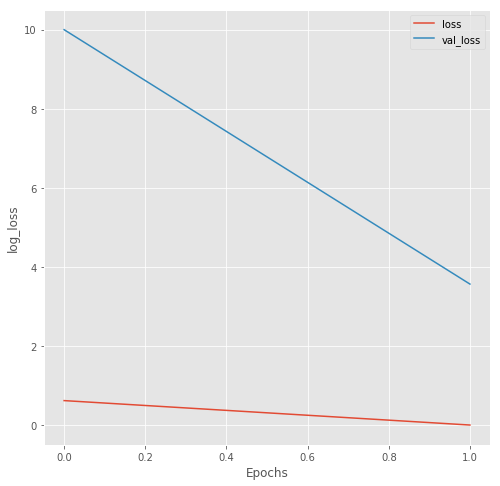

In [28]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(tr_res.history["loss"], label="loss")
plt.plot([10,ev_res[0]], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()
plt.show()

In [30]:
model_name = "tf_serving_keras_mobilenetv2"
model.save(f"models/{model_name}.h5")